<a href="https://colab.research.google.com/github/Sebastian-Schuchmann/ChurrosSamosaClassifier/blob/main/Train_a_Food_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Food Classifier


## Load and prepare Data

In [ ]:
!pip install -Uqq fastai
from fastai.vision.all import *

In [ ]:
foodPath = untar_data(URLs.FOOD)

In [ ]:
#How many images are we dealing with
len(get_image_files(foodPath))

101000

In [ ]:
#Use Pandas to parse the JSON as a human readable table
pd.read_json('/root/.fastai/data/food-101/train.json')

churros          hot_and_sour_soup          samosa  \
0    churros/1004234  hot_and_sour_soup/1002782  samosa/1008131   
1    churros/1013460  hot_and_sour_soup/1003688  samosa/1011601   
2    churros/1016791  hot_and_sour_soup/1008185   samosa/101365   
3     churros/102100  hot_and_sour_soup/1008701  samosa/1015943   
4    churros/1025494  hot_and_sour_soup/1008924  samosa/1016296   
..               ...                        ...             ...   
745   churros/977938   hot_and_sour_soup/983606   samosa/987023   
746   churros/978170   hot_and_sour_soup/991636   samosa/989842   
747    churros/98227   hot_and_sour_soup/993036   samosa/991952   
748   churros/993534   hot_and_sour_soup/997881   samosa/992201   
749   churros/995379   hot_and_sour_soup/997971   samosa/995011   

             sashimi          pork_chop          spring_rolls  \
0    sashimi/1001239  pork_chop/1000802  spring_rolls/1002160   
1    sashimi/1001363  pork_chop/1006233  spring_rolls/1003056   
2    sashimi/1002556  pork_chop/1019530  spring_rolls/1003507   
3    sashimi/1007253  pork_chop/1019569  spring_rolls/1008736   
4    sashimi/1010510  pork_chop/1025391  spring_rolls/1012525   
..               ...                ...                   ...   
745    sashimi/98340   pork_chop/968836   spring_rolls/989498   
746   sashimi/987088    pork_chop/96943   spring_rolls/995483   
747   sashimi/987318   pork_chop/970362   spring_rolls/996700   
748   sashimi/993162    pork_chop/99168   spring_rolls/998226   
749   sashimi/994242    pork_chop/99739   spring_rolls/999277   

             panna_cotta          beef_tartare          greek_salad  \
0    panna_cotta/1001332  beef_tartare/1000431  greek_salad/1007149   
1    panna_cotta/1003460  beef_tartare/1005746  greek_salad/1009138   
2    panna_cotta/1011097  beef_tartare/1009672  greek_salad/1010520   
3    panna_cotta/1013000  beef_tartare/1012128  greek_salad/1011665   
4    panna_cotta/1020036  beef_tartare/1027680  greek_salad/1012989   
..                   ...                   ...                  ...   
745   panna_cotta/971492    beef_tartare/97708   greek_salad/986206   
746   panna_cotta/972152   beef_tartare/987587   greek_salad/994568   
747   panna_cotta/973687   beef_tartare/987926   greek_salad/995049   
748    panna_cotta/97774   beef_tartare/999120    greek_salad/99676   
749   panna_cotta/993459   beef_tartare/999539   greek_salad/997715   

             foie_gras  ...          chicken_quesadilla          pho  \
0    foie_gras/1004944  ...  chicken_quesadilla/1004279  pho/1005681   
1    foie_gras/1008577  ...  chicken_quesadilla/1009225  pho/1011443   
2    foie_gras/1011711  ...  chicken_quesadilla/1011413  pho/1012513   
3    foie_gras/1017233  ...  chicken_quesadilla/1023828  pho/1019401   
4    foie_gras/1023512  ...  chicken_quesadilla/1024740  pho/1021371   
..                 ...  ...                         ...          ...   
745   foie_gras/950701  ...   chicken_quesadilla/992658   pho/969401   
746   foie_gras/952007  ...   chicken_quesadilla/993661   pho/981313   
747   foie_gras/976580  ...   chicken_quesadilla/993767   pho/988049   
748   foie_gras/978439  ...   chicken_quesadilla/997377   pho/998863   
749   foie_gras/984109  ...   chicken_quesadilla/999369   pho/999247   

             prime_rib          cheesecake          ice_cream  \
0    prime_rib/1001089  cheesecake/1001446  ice_cream/1012277   
1    prime_rib/1006320  cheesecake/1004515   ice_cream/101858   
2     prime_rib/100945  cheesecake/1004807   ice_cream/102595   
3      prime_rib/10120  cheesecake/1017408  ice_cream/1044117   
4    prime_rib/1016126  cheesecake/1021942   ice_cream/104465   
..                 ...                 ...                ...   
745   prime_rib/992983   cheesecake/952846   ice_cream/978261   
746   prime_rib/993496   cheesecake/958209   ice_cream/978988   
747   prime_rib/996023   cheesecake/971470   ice_cream/987631   
748   prime_rib/998348   cheesecake/983639   ice_cream/9886

In [ ]:
#Deciding which foods we want to classify
labelA = 'cheesecake'
labelB = 'ice_cream'
labelC = 'grilled_cheese_sandwich'
labelD = 'nachos'
labelE = 'prime_rib'
labelF = 'chicken_quesadilla	'
labelH = 'omelette'
labelI = 'pork_chop'
labelJ = 'sashimi'
labelK = 'greek_salad	'

In [ ]:
#Loop through all Images downloaded
for img in get_image_files(foodPath):
  #Rename Images so that the Label (Samosa or Churros) is in the file name
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}-{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}-{img.name}")
  elif labelC in str(img):
    img.rename(f"{img.parent}/{labelC}-{img.name}")
  elif labelD in str(img):
    img.rename(f"{img.parent}/{labelD}-{img.name}")
  elif labelE in str(img):
    img.rename(f"{img.parent}/{labelE}-{img.name}")
  elif labelF in str(img):
    img.rename(f"{img.parent}/{labelF}-{img.name}")
  elif labelH in str(img):
    img.rename(f"{img.parent}/{labelH}-{img.name}")
  elif labelI in str(img):
    img.rename(f"{img.parent}/{labelI}-{img.name}")
  elif labelJ in str(img):
    img.rename(f"{img.parent}/{labelJ}-{img.name}")
  elif labelK in str(img):
    img.rename(f"{img.parent}/{labelK}-{img.name}")
  else: os.remove(img) #If the Images are not part of labelA or labelB

len(get_image_files(foodPath))

8000

## Train Model

In [ ]:
def GetLabel(fileName):
  return fileName.split('-')[0]

GetLabel("churros-734186.jpg") #Testing

'churros'

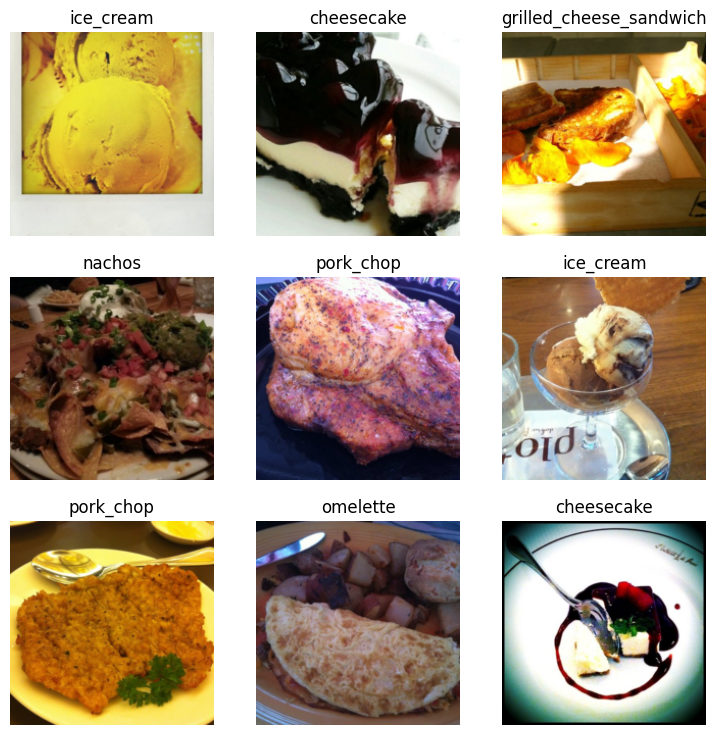

In [ ]:
dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(200))

dls.train.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 58.0MB/s]


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


## Verify Model

### Upload your own Images

Saving example_4.jpg to example_4.jpg


This is a grilled_cheese_sandwich.
cheesecake 0.001544
grilled_cheese_sandwich 0.998448
ice_cream 0.000001
nachos 0.000000
omelette 0.000006
pork_chop 0.000000
prime_rib 0.000000
sashimi 0.000001


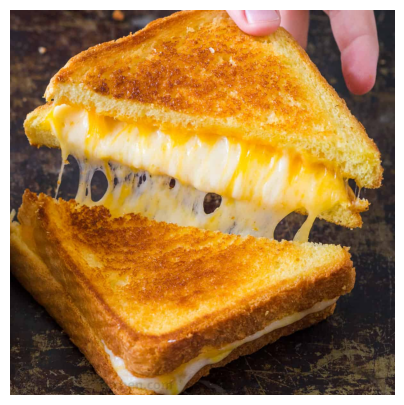

In [ ]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}.")
for idx, lbl in enumerate(learn.dls.vocab):
    print(f"{lbl} {probs[idx].item():.6f}")

### Test using images in dataset

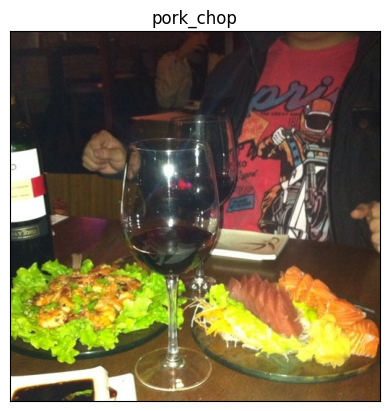

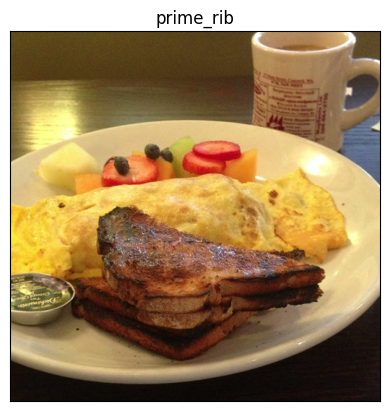

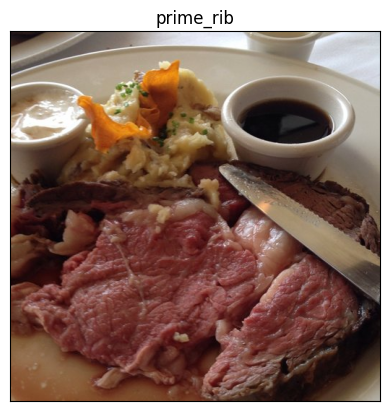

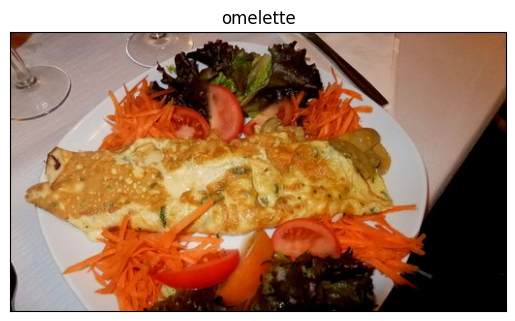

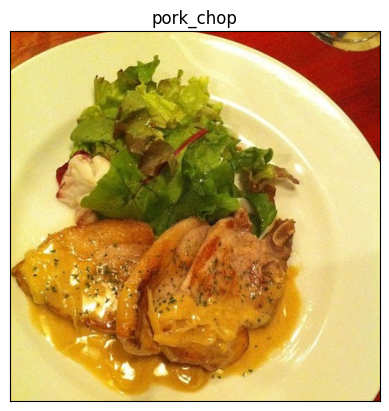

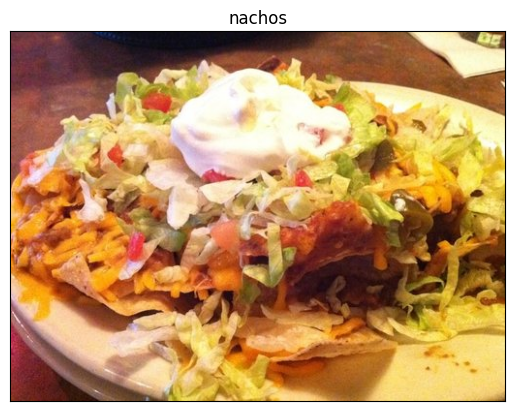

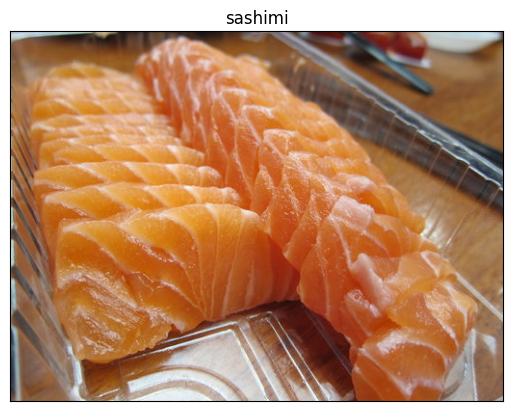

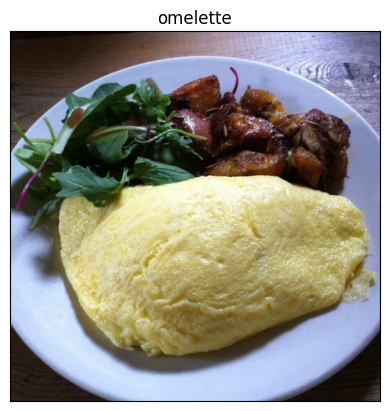

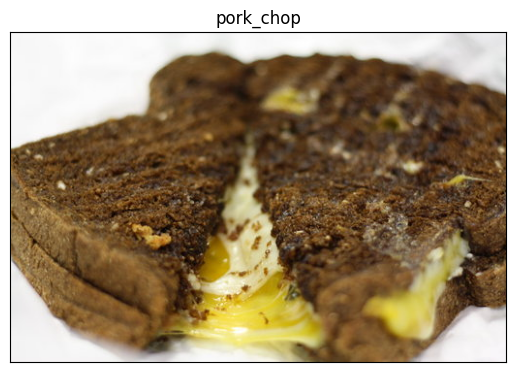

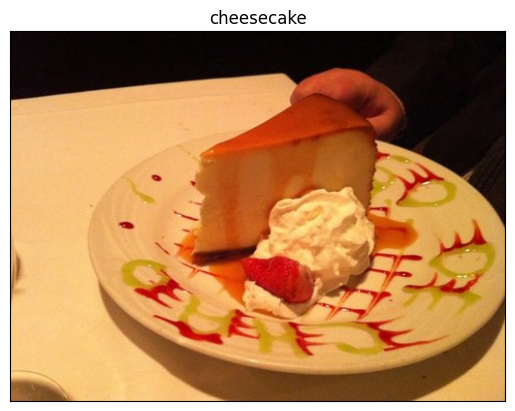

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)